<h1><b>Tarea 3: Ajuste de datos experimentales<b></h1>

---
<div align="right">
<font size=2>
Estiven Castrillón Alzate<br>
Institute of Physics<br>
</font>
</div>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La incertidumbre de los instrumentos son las siguientes:
- Cronómetro, (medidas de periodos) = $\pm 0.01 \space \text{s}$
- Flexómetro, (longitudes de péndulos) = $\pm 0.01 \space \text{m}$

**Nota:** Las siguientes medidas de tiempo en péndulos fueron medidas con 10 oscilaciones y con la longitud expresada en los nombres de las columnas

In [42]:
# raw_data = pd.read_excel('/content/datos_periodos_diez_osc_tarea3 (1).xlsx')
raw_data_json = '{"0.18m":{"0":8.54,"1":8.49,"2":8.77,"3":8.88,"4":8.48,"5":8.52,"6":8.58,"7":8.46,"8":8.77,"9":8.67},"0.29m":{"0":10.9,"1":10.96,"2":10.98,"3":10.91,"4":10.99,"5":11.0,"6":10.91,"7":10.98,"8":11.02,"9":10.82},"0.39m":{"0":12.59,"1":12.64,"2":12.75,"3":12.51,"4":12.51,"5":12.69,"6":12.63,"7":12.62,"8":12.62,"9":12.6},"0.51m":{"0":14.57,"1":14.34,"2":14.42,"3":14.41,"4":14.54,"5":14.38,"6":14.52,"7":14.48,"8":14.43,"9":14.37},"0.62m":{"0":15.97,"1":15.96,"2":15.71,"3":15.81,"4":15.93,"5":15.91,"6":15.96,"7":15.8,"8":15.84,"9":15.87},"0.87m":{"0":18.54,"1":18.64,"2":18.39,"3":18.5,"4":18.73,"5":18.45,"6":18.66,"7":18.74,"8":18.51,"9":18.66}}'
raw_data = pd.read_json(raw_data_json)
raw_data.head(2)

,0.18m,0.29m,0.39m,0.51m,0.62m,0.87m
0,8.54,10.90,12.59,14.57,15.97,18.54
1,8.49,10.96,12.64,14.34,15.96,18.64


Dataframe de periodos

In [45]:
periodo_data = raw_data / 10
periodo_data.head(2)

medias_periodos = pd.DataFrame(periodo_data.mean(), columns=['promedio_periodo'])
medias_periodos.head(2)

,promedio_periodo
0.18m,0.8616
0.29m,1.0947


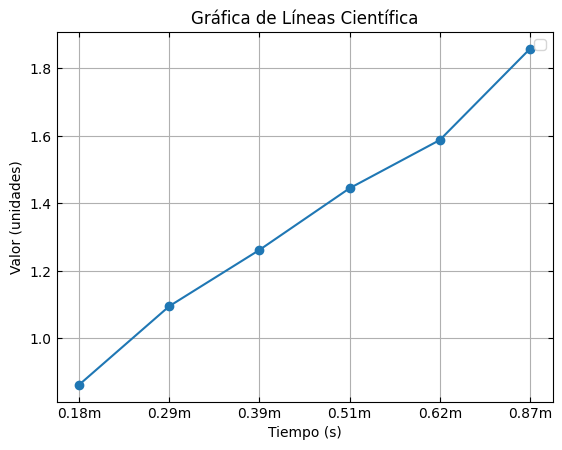

In [44]:
fig, ax = plt.subplots()

# Configura el título y las etiquetas de los ejes
ax.set_title('Gráfica de Líneas Científica')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Valor (unidades)')

# Personaliza la apariencia de la gráfica
ax.grid(True)  # Activa la cuadrícula
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)  # Coloca las marcas de los ejes adentro

# Añade una leyenda (opcional)
ax.legend(['Datos'])

# Dibuja la gráfica de líneas
ax.plot(medias_periodos.index, medias_periodos['promedio_periodo'], marker='o', linestyle='-')

plt.show()
